# Task 1: Acquire, Preprocess, and Analyze the Data


## DataSet Analysis - Adult Census Quality DataSet

Link:https://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import math

## Load the Adult Census Dataset and remove missing/malformed data

In [3]:
# Load the Adult Census Dataset from URL
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Open dataset using pandas and specify column headers
df = pd.read_csv(URL, delimiter=",", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

# Remove any rows that have a ? or NaN(missing data) anywhere
df = df[~df.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]
df.dropna(how ='any')

# Remove columns (i.e. features) that have majority 0s
del df["capital-gain"]
del df["capital-loss"]

# Display first 10 rows to get a picture of the data
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


## One Hot Encoding

In [4]:
ohe = OneHotEncoder(categories='auto')

# Create the feature array 
feature_arr = ohe.fit_transform(df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']]).toarray()
#print(feature_arr)

# Print all the new feature names to make sure they are correct 
feature_names = ohe.get_feature_names(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income'])
#print(feature_names)

# Add the feature names to the columns to check if the encoding is correct and show first 10 rows
df_ohe = pd.DataFrame(feature_arr,columns = feature_names)
df_ohe.head(-10)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
30148,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30149,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
30150,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
# Have to reset index so that the dataframes are concatonated correctly
df.reset_index(drop=True, inplace=True)
df_ohe.reset_index(drop=True, inplace=True)

# Concat the one hot encoded rows to the original data frame
df_concat = pd.concat( [df, df_ohe], axis=1) 
df_concat.head(-10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30147,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
30148,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30149,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
30150,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
# Replace/delete the categorical columns with the one hot encoded columns
df_final = df_concat.drop(['workclass','fnlwgt','education','marital-status','occupation','relationship','race','sex','native-country','income'],axis = 1)

# Dropping the native countries columns because skewed
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='native-country')))]

# Dropping the race columns because majority are white 
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='race_')))]


df_final.head(10)

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,13,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,50,13,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,38,9,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,53,7,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,28,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,37,14,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,49,5,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,52,9,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,31,14,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,42,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Basic stats/ counts for each feature

In [7]:
# Find the basic stats for each feature 
df_concat.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
count,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,...,0.000365,0.002354,0.001392,0.000564,0.000597,0.911876,0.002122,0.000530,0.751078,0.248922
std,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,...,0.019094,0.048461,0.037291,0.023734,0.024422,0.283480,0.046016,0.023026,0.432396,0.432396
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,NaN,1.176272e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,NaN,2.376285e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [8]:
# Find the counts for each feature
df_ohe.apply(pd.Series.value_counts)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0.0,29219,28095,7876,29088,27663,28883,30148,29342,29114,29785,...,30151,30091,30120,30145,30144,2658,30098,30146,7508,22654
1.0,943,2067,22286,1074,2499,1279,14,820,1048,377,...,11,71,42,17,18,27504,64,16,22654,7508


## Split dataset into positive and negative classes (>50k and <=50k)

In [9]:
#Split Data between >50k and < 50K income 

# without the categorical data
positive = df_final['income_ >50K'] == 1
pos_data = df_final[positive]
negative = df_final['income_ <=50K'] == 1
neg_data = df_final[negative]

# with categorical data
positive_concat = df_concat['income_ >50K'] == 1
pos_data_concat = df_concat[positive]
negative_concat = df_concat['income_ <=50K'] == 1
neg_data_concat = df_concat[negative]

In [10]:
pos_data.head(10)

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
7,52,9,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,31,14,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,42,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10,37,10,80,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11,30,13,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
18,43,14,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
19,40,16,60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
24,56,13,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
42,57,13,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
48,47,15,60,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [11]:
pos_data_concat.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
count,7508.000000,7508,7.508000e+03,7508,7508.000000,7508,7508,7508,7508,7508,...,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.0,7508.0
unique,NaN,6,NaN,15,NaN,7,14,6,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,Bachelors,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4876,NaN,2126,NaN,6399,1937,5679,6839,6396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,43.959110,NaN,1.881500e+05,NaN,11.606420,NaN,NaN,NaN,NaN,NaN,...,0.000266,0.001865,0.002531,0.000400,0.000266,0.931673,0.000666,0.000799,0.0,1.0
std,10.269633,NaN,1.028217e+05,NaN,2.368423,NaN,NaN,NaN,NaN,NaN,...,0.016320,0.043145,0.050245,0.019987,0.016320,0.252323,0.025799,0.028260,0.0,0.0
min,19.000000,NaN,1.487800e+04,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,36.000000,NaN,1.191005e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0
50%,43.000000,NaN,1.761850e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0
75%,51.000000,NaN,2.310660e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0


In [12]:
neg_data_concat.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
count,22654.000000,22654,2.265400e+04,22654,22654.000000,22654,22654,22654,22654,22654,...,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.000000,22654.0,22654.0
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,HS-grad,NaN,Never-married,Adm-clerical,Not-in-family,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17410,NaN,8223,NaN,9256,3223,6903,19094,13984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.608060,NaN,1.903386e+05,NaN,9.629116,NaN,NaN,NaN,NaN,NaN,...,0.000397,0.002516,0.001015,0.000618,0.000706,0.905315,0.002604,0.000441,1.0,0.0
std,13.464631,NaN,1.065713e+05,NaN,2.413596,NaN,NaN,NaN,NaN,NaN,...,0.019928,0.050099,0.031848,0.024852,0.026567,0.292786,0.050968,0.021006,0.0,0.0
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,26.000000,NaN,1.173120e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.0
50%,34.000000,NaN,1.795085e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.0
75%,45.000000,NaN,2.394390e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.0


## Plot the Distributions/ Histograms of Various Features

C:\Users\patri\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\patri\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


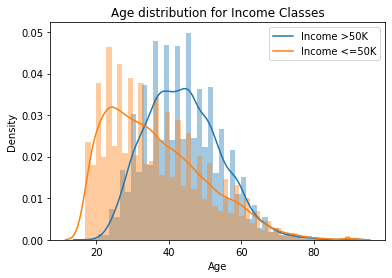

In [13]:
# Age - positive
sns.distplot(pos_data['age'])

# Age - negative
sns.distplot(neg_data['age'])

plt.title('Age distribution for Income Classes')
plt.ylabel('Density')
plt.xlabel('Age')
plt.legend(labels=['Income >50K','Income <=50K'])


Text(0.5, 0, 'Education Level')

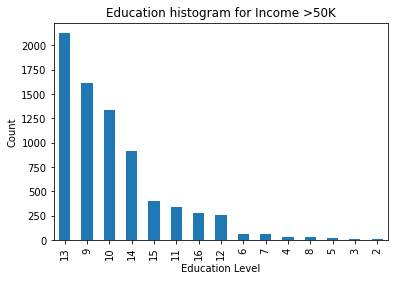

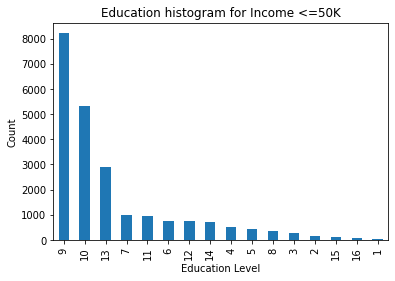

In [14]:
# Education - positive
plt.figure(0)
pos_data_concat['education-num'].value_counts().plot(kind='bar')
plt.title('Education histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Education Level')

# Education - negative
plt.figure(1)
neg_data_concat['education-num'].value_counts().plot(kind='bar')
plt.title('Education histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Education Level')


Text(0.5, 0, 'Marital Status')

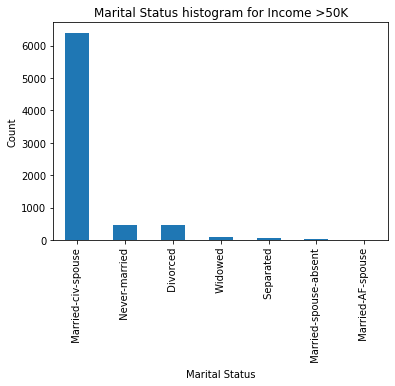

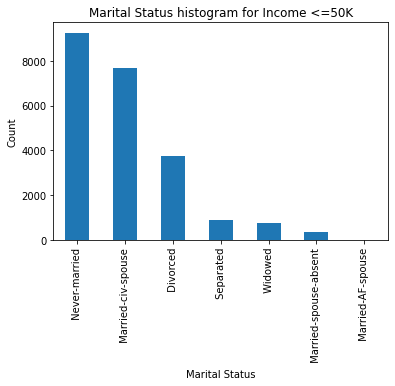

In [15]:
# Marital Sstatus - positive
plt.figure(0)
pos_data_concat['marital-status'].value_counts().plot(kind='bar')
plt.title('Marital Status histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Marital Status')

# Education - negative
plt.figure(1)
neg_data_concat['marital-status'].value_counts().plot(kind='bar')
plt.title('Marital Status histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Marital Status')


Text(0.5, 0, 'Workclass')

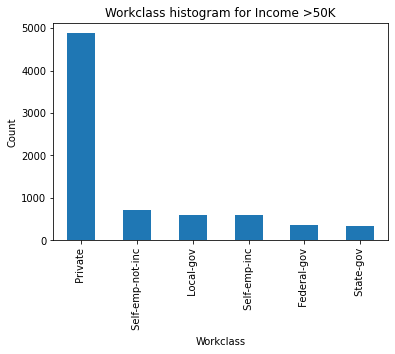

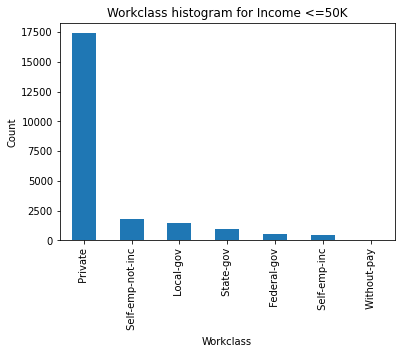

In [16]:
# Workclass - positive
plt.figure(0)
pos_data_concat['workclass'].value_counts().plot(kind='bar')
plt.title('Workclass histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Workclass')

# Workclass - negative
plt.figure(1)
neg_data_concat['workclass'].value_counts().plot(kind='bar')
plt.title('Workclass histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Workclass')


The workclass doesn't seem to be an important feature 

Text(0.5, 0, 'Occupation')

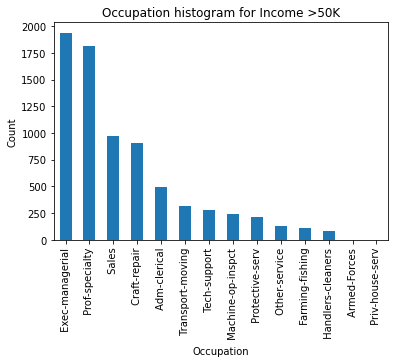

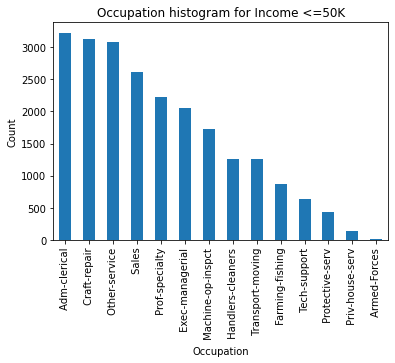

In [17]:
# Occupation - positive 
plt.figure(0)
pos_data_concat['occupation'].value_counts().plot(kind='bar')
plt.title('Occupation histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Occupation')

# Workclass - negative
plt.figure(1)
neg_data_concat['occupation'].value_counts().plot(kind='bar')
plt.title('Occupation histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Occupation')

Text(0.5, 0, 'Sex')

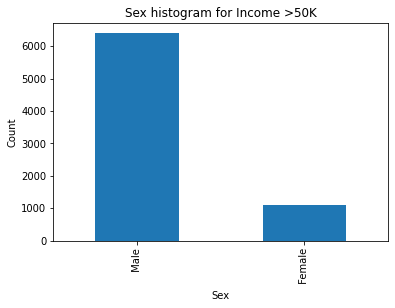

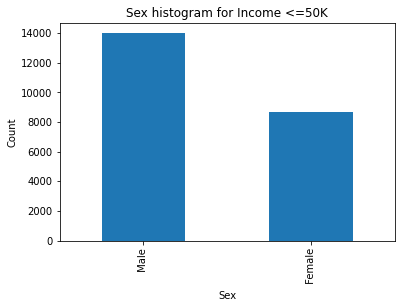

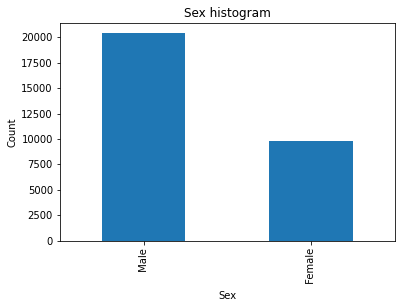

In [18]:
# Sex - positive 
plt.figure(0)
pos_data_concat['sex'].value_counts().plot(kind='bar')
plt.title('Sex histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Sex')

# Sex - negative
plt.figure(1)
neg_data_concat['sex'].value_counts().plot(kind='bar')
plt.title('Sex histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Sex')

# Sex - total
plt.figure(2)
df_concat['sex'].value_counts().plot(kind='bar')
plt.title('Sex histogram')
plt.ylabel('Count')
plt.xlabel('Sex')


Text(0.5, 0, 'Race')

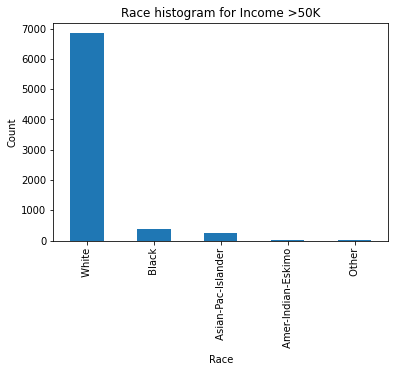

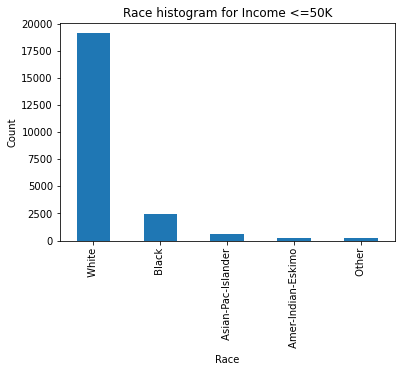

In [19]:
# Race - positive 
plt.figure(0)
pos_data_concat['race'].value_counts().plot(kind='bar')
plt.title('Race histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Race')

# Race - negative
plt.figure(1)
neg_data_concat['race'].value_counts().plot(kind='bar')
plt.title('Race histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Race')

The majority of the data was collected from white people, so it makes sense that the histogram shows a bias towards race= white.

This feature might not be useful because it is biased?

Text(0.5, 0, 'Relationship')

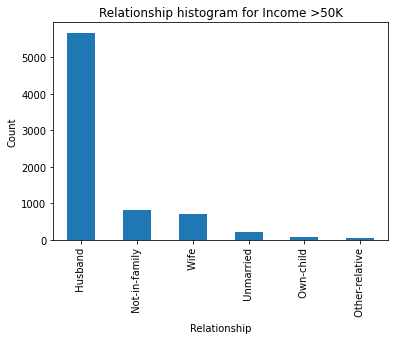

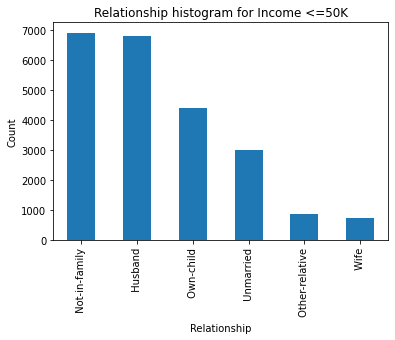

In [20]:
# Relationship - positive 
plt.figure(0)
pos_data_concat['relationship'].value_counts().plot(kind='bar')
plt.title('Relationship histogram for Income >50K')
plt.ylabel('Count')
plt.xlabel('Relationship')

# Relationship - negative
plt.figure(1)
neg_data_concat['relationship'].value_counts().plot(kind='bar')
plt.title('Relationship histogram for Income <=50K')
plt.ylabel('Count')
plt.xlabel('Relationship')

Text(0.5, 0, 'Country')

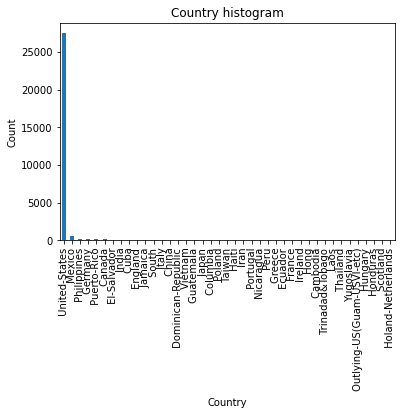

In [21]:
plt.figure(0)
df_concat['native-country'].value_counts().plot(kind='bar')
plt.title('Country histogram')
plt.ylabel('Count')
plt.xlabel('Country')


## Split Data between Training and Test Data (80/20 split)


In [22]:
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = df_final.copy()
train_set = data_copy.sample(frac=0.80, random_state=0) #random state = 0 means the split will be zero each run
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = int)
y_train = np.array(train_set["income_ >50K"], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = int)
y_test = np.array(test_set["income_ >50K"], dtype = int)

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (24130, 56)
y_train size:  (24130,)
x_test size:  (6032, 56)
y_test size:  (6032,)


# Task 2 - Implement the Models



In [23]:
# Load the Adult Census Dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Open dataset using pandas and convert to numpy array
df = pd.read_csv(URL, delimiter=",", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

# Remove any rows that have a ? or Nan(missing data) anywhere
df = df[~df.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]
df.dropna(how ='any')

# Remove columns (i.e. features) that have majority 0s
del df["capital-gain"]
del df["capital-loss"]

# One Hot Encoding 
ohe = OneHotEncoder(categories='auto')

# Create the feature array 
feature_arr = ohe.fit_transform(df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']]).toarray()
#print(feature_arr)

# Print all the new feature names to make sure they are correct 
feature_names = ohe.get_feature_names(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income'])
#print(feature_names)

# Add the feature names to the columns to check if the encoding is correct
df_ohe = pd.DataFrame(feature_arr,columns = feature_names)

# Have to reset index so that the dataframes are concatonated correctly
df.reset_index(drop=True, inplace=True)
df_ohe.reset_index(drop=True, inplace=True)

# Concat the one hot encoded rows to the original data frame
df_concat = pd.concat( [df, df_ohe], axis=1) 

# Replace/delete the categorical columns with the one hot encoded columns
df_final = df_concat.drop(['workclass','fnlwgt','education','marital-status','occupation','relationship','race','sex','native-country','income','income_ <=50K'],axis = 1)

# Dropping the native countries columns because skewed
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='native-country')))]

# Dropping the race columns because majority are white 
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='race_')))]

df_final.head(10)

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male,income_ >50K
0,39,13,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,13,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38,9,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,7,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,37,14,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,49,5,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,52,9,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,31,14,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,42,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [24]:
# Make a not one hot encoded dataframe for multinomial naive bayes 

# Load the Adult Census Dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Open dataset using pandas and convert to numpy array
df = pd.read_csv(URL, delimiter=",", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

# Remove any rows that have a ? or Nan(missing data) anywhere
df = df[~df.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]
df.dropna(how ='any')

# Remove columns (i.e. features) that have majority 0s
del df["capital-gain"]
del df["capital-loss"]

# One Hot Encoding 
ohe = OneHotEncoder(categories='auto')
le = LabelEncoder()

# Create the feature array 
feature_arr = ohe.fit_transform(df[['income']]).toarray()
#print(feature_arr)

# Print all the new feature names to make sure they are correct 
feature_names = ohe.get_feature_names(['income'])
#print(feature_names)

# Add the feature names to the columns to check if the encoding is correct
df_ohe = pd.DataFrame(feature_arr,columns = feature_names)

# Have to reset index so that the dataframes are concatonated correctly
df.reset_index(drop=True, inplace=True)
df_ohe.reset_index(drop=True, inplace=True)

# Concat the one hot encoded rows to the original data frame
df_concat = pd.concat( [df, df_ohe], axis=1) 

df_nb = df_concat.drop(['fnlwgt','race','education-num','native-country','income','income_ <=50K'],axis = 1)

df_nb_encoded = df_nb.apply(le.fit_transform)

df_nb_encoded.head(10)

,age,workclass,education,marital-status,occupation,relationship,sex,hours-per-week,income_ >50K
0,22,5,9,4,0,1,1,39,0
1,33,4,9,2,3,0,1,12,0
2,21,2,11,0,5,1,1,39,0
3,36,2,1,2,5,0,1,39,0
4,11,2,9,2,9,5,0,39,0
5,20,2,12,2,3,5,0,39,0
6,32,2,6,3,7,1,0,15,0
7,35,4,11,2,3,0,1,44,1
8,14,2,12,4,9,1,0,49,1
9,25,2,9,2,3,0,1,39,1


### Logistic Regression

In [25]:
class LogisticRegression:

    def __init__(self, intercept = True): 
        #self.num_steps = num_steps
        #self.leaning_rate = learning_rate
        #self.error_rate = error_rate
        self.intercept = intercept

    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X), axis = 1)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
                  
                  
    def cost_function(self, X, y, w): #Cross Entropy Loss Function
        N,D = X.shape
        z = np.dot(X, w)
        
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
        grad = np.dot(X.T,(self.sigmoid(z) - y)) / N
        
        return grad, J
    
                  
    def gradient_descent(self, X, y, num_steps, learning_rate, min_error):
        # Min error is just the early termination requirement (Set up as Small change is objective right now)
        N,D = X.shape
        w = np.zeros(D)
        grad, J_previous = self.cost_function(X, y, w)
        
        for i in range(num_steps):
                grad, J = self.cost_function(X, y, w)
                w = w - (learning_rate * grad)
                
                if np.linalg.norm(grad) < min_error:
                #if np.abs(J - J_previous) < min_error: # Need to determine the best way to determine the early stopping point
                    break
                else:
                    J_previous = J
                  
        print("Number of Iterations = " + str(i))
        print("Minimum Cost (J) = " + str(J))          
        return w, J

    
    def fit(self, X, y, num_steps, learning_rate, min_error): #Logistic regression and Gradient Descent (Input is X and y, outputs weights of model)
        if self.intercept == True:
            X = self.add_intercept(X)
            
        
        #Gradient function
        w, J = self.gradient_descent(X, y, num_steps, learning_rate, min_error)
        
        print("Weights of Model: ", w)
        return w
    
    def predict(self, X, w): #Ouput is the predicted values for y
        if self.intercept == True:
            X = self.add_intercept(X)
        
        y_pred = self.sigmoid(np.dot(X, w))
        y_pred = y_pred.round() #Rounds the value to 1 or 0
        
        #print("y_pred Shape")
        #print(y_pred.shape)
        return y_pred
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        #Error Rate = (FP + FN)/P + N
        #Precision = TP/RP
        #Recall = TP/P
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        try:  
            precision = (TP / (RP))*100
        except:
            print('Error: Divide by Zero')
            precision = np.nan
        try:
            recall = (TP / (P))*100
        except:
            print('Error: Divide by Zero')
            recall = np.nan

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        return A  

### Multinomial Naive Bayes

In [26]:
import numpy as np
from collections import Counter

class MultinomialNaiveBayes:
    
    def fit(self, x_train, y_train):

        ### Compute Priors
        neg_count = np.count_nonzero(y_train == 0)
        pos_count = np.count_nonzero(y_train == 1)
        total_count = neg_count + pos_count
        neg_prior = neg_count/total_count
        pos_prior = pos_count/total_count

        ### Compute likelihoods
        list_feature_class = []

        # Create a tuple that contains (column/feature #, value, class) and add it to a list
        for (row,col), value in np.ndenumerate(x_train):
            feature_class = (col, value, y_train[row])
            list_feature_class.append(feature_class)

        # Get the counts for each feature-value-class tuple
        dict_counts = Counter(list_feature_class)

        # Convert to data frame to make accessing elements easier 
        df_counts = pd.DataFrame(dict_counts.items())
        df_keys = pd.DataFrame(list(dict_counts))

        # Concat the keys and values into one dataframe
        df = pd.concat([df_keys,df_counts[1]], axis = 1)
        df.columns = [ 'featureNum', 'value', 'class','counts' ]


        # Loop through each row and compute the likelihood and store in another array
        likelihoods = []
        for row in df.itertuples(index=False):
            # row[0] Column #
            # row[1] Value 
            # row[2] Class
            # row[3] Count 

            # If class is 0, divide count by neg class count 
            if row[2] == 0:
                likelihoods.append(row[3]/neg_count)
            # If class is 1, divide count by pos class count 
            elif row[2] == 1:
                likelihoods.append(row[3]/pos_count)

        # Add likelihoods column to dataframe 
        df['likelihoods'] = likelihoods 

        return df, neg_prior, pos_prior
        
    def predict(self, x_test, df_likelihoods, neg_prior, pos_prior):

        df_xtest = pd.DataFrame(x_test)
        df_xtest.head(10)

        neg_likelihoods = []
        pos_likelihoods = []

        for (row,col), value in np.ndenumerate(x_test):

            #### Compute negative posterior prob
            filt1 = df_likelihoods["featureNum"] == col
            filt2 = df_likelihoods["value"] == value
            filt3 = df_likelihoods["class"] == 0

            # Find the row where the filters hold true
            neg_likelihood_row = df_likelihoods.where(filt1 & filt2 & filt3)

            # Select only the likelihood from the row
            neg_likelihood = neg_likelihood_row["likelihoods"]

            # Remove the other NaN values 
            neg_likelihood.dropna(axis=0, inplace=True)

            # If the likelihood value is not empty, then add to the likelihoods array
            if neg_likelihood.values.size > 0:
                neg_likelihoods.append(neg_likelihood.values[0])
            # If the likelihood value is empty, add a 1 to the array --> log(1) = 0
            elif neg_likelihood.values.size == 0:
                neg_likelihoods.append(1)

            #### Compute positive posterior prob
            filt4 = df_likelihoods["class"] == 1

            pos_likelihood_row = df_likelihoods.where(filt1 & filt2 & filt4)
            pos_likelihood = pos_likelihood_row["likelihoods"]
            pos_likelihood.dropna(axis=0, inplace=True)

            # If the likelihood value is not empty, then add to the likelihoods array
            if pos_likelihood.values.size > 0:
                pos_likelihoods.append(pos_likelihood.values[0])
            # If the likelihood value is empty, add a 1 to the array --> log(1) = 0
            elif pos_likelihood.values.size == 0:
                pos_likelihoods.append(1)

        # Reshape the likelihood array into the same size as x_test
        pos_likelihoods = np.reshape(pos_likelihoods, x_test.shape)
        neg_likelihoods = np.reshape(neg_likelihoods, x_test.shape)

        #lambda func to take log of each element
        log_likelihood = lambda x: np.log(x)

        # negative and positive log likelihoods
        neg_log_likelihoods = log_likelihood(neg_likelihoods)
        pos_log_likelihoods = log_likelihood(pos_likelihoods)
        sum_neg_loglike = np.sum(neg_log_likelihoods,axis=1)
        sum_pos_loglike = np.sum(pos_log_likelihoods,axis=1)

        # Compute neg and pos log posteriors
        compute_neg_posterior = lambda x: (x + np.log(neg_prior))
        compute_pos_posterior = lambda x: (x + np.log(pos_prior))

        log_neg_posterior = compute_neg_posterior(sum_neg_loglike)
        log_pos_posterior = compute_pos_posterior(sum_pos_loglike)

        # Get the posteriors
        neg_posterior = np.exp(log_neg_posterior)
        pos_posterior = np.exp(log_pos_posterior)

        y_pred = []

        for i in range(len(neg_posterior)):
            if neg_posterior[i]>pos_posterior[i]:
                y_pred.append(0)
            else:
                y_pred.append(1)


        return y_pred
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        #Error Rate = (FP + FN)/P + N
        #Precision = TP/RP
        #Recall = TP/P
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        RN = TN + FN
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        try:  
            precision = (TP / (RP))*100
        except:
            print('Error: Divide by Zero')
            precision = np.nan
        try:
            recall = (TP / (P))*100
        except:
            print('Error: Divide by Zero')
            recall = np.nan
            

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        return A

### K-Fold Cross Validation

In [27]:
# Implement a K-Fold Validation for Logistic Regression
# Split the training set into K folds and determine the average accuracy

def cross_validation_LR(model, x_train, y_train, K, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        w = model.fit(x_training, y_training, num_steps, learning_rate, min_error)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val, w)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy

In [28]:
# Implement a K-Fold Validation for Naive Bayes
# Split the training set into K folds and determine the average accuracy

def cross_validation_NB(model, x_train, y_train, K, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        likelihoods, neg_prior,pos_prior = model.fit(x_training, y_training)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val,likelihoods,neg_prior,pos_prior)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy
    

# Task 3 - Run Experiments

Run Models and Test Accuracy for varying parameters

In [29]:
# Split Data between Training and Test Data (80/20 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = df_final.copy()
train_set = data_copy.sample(frac=0.80, random_state=0)
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = float)
y_train = np.array(train_set.iloc[:, -1], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = float)
y_test = np.array(test_set.iloc[:, -1], dtype = int)


### Cross Validation of Logistic Regression

In [29]:
Model_Logistic_Regression = LogisticRegression(intercept = True)

In [30]:
cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)

Number of Iterations = 24999
Minimum Cost (J) = 0.8352536867362312
Weights of Model:  [-2.91497353 -0.07275681  0.34219888 -0.05787511  0.24958319 -0.77442551
 -1.09951637  0.64610684 -1.21846489 -0.68605285 -0.03220395 -0.61028485
 -0.68871361 -0.24537644 -0.10573814 -0.24981133 -0.53561409 -0.42588023
 -0.42535328 -0.37710743  0.71613841  0.65887027 -1.76321728  1.02448521
 -0.03202769  1.10660014 -0.96194318 -1.16145289  0.03799893  1.54152069
 -0.18654186 -2.50140191 -0.38711106 -0.25798543 -0.44511698 -0.01600433
 -1.03271968  2.07706371 -1.2029508  -0.92299455 -0.98546118 -1.49013771
 -0.07674597  1.30419076 -0.01342123  0.334726    0.24080039 -0.68620196
  0.66860372 -1.30424467 -0.50975139 -1.62469601 -1.25008538  1.1052002
 -1.95984717 -0.95512636]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  71.73913043478261 %
Recall:  2.7071369975389663 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.200477596673782
Weights of Model:  [-2.89745838  0.02

73.23663489432242

### Cross Validation of Naive Bayes

In [31]:
# Split Data between Training and Test Data (80/20 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = df_nb_encoded.copy()
train_set = data_copy.sample(frac=0.80, random_state=0)
test_set = data_copy.drop(train_set.index)
          
x_train_nb = np.array(train_set.iloc[:, :-1], dtype = float)
y_train_nb = np.array(train_set.iloc[:, -1], dtype = int)
          
x_test_nb = np.array(test_set.iloc[:, :-1], dtype = float)
y_test_nb = np.array(test_set.iloc[:, -1], dtype = int)

In [32]:
Model_Naive_Bayes = MultinomialNaiveBayes()
cross_validation_NB(Model_Naive_Bayes, x_train_nb, y_train_nb, K = 5, random_shuffle = False)

Accuracy:  78.94736842105263 %
Error Rate:  21.052631578947366 %
Precision:  56.045265038713524 %
Recall:  77.19442165709597 % 

Accuracy:  78.63655200994613 %
Error Rate:  21.363447990053874 %
Precision:  54.8502994011976 %
Recall:  76.78122380553228 % 

Accuracy:  79.54828014919187 %
Error Rate:  20.45171985080812 %
Precision:  57.160493827160494 %
Recall:  75.96390484003281 % 

Accuracy:  80.46000828843763 %
Error Rate:  19.539991711562372 %
Precision:  57.60801502817783 %
Recall:  77.57166947723441 % 

Accuracy:  78.9680895151264 %
Error Rate:  21.0319104848736 %
Precision:  54.83476132190942 %
Recall:  76.38533674339301 % 

average cross validation model accuracy = 79.31205967675093% 



79.31205967675093

Number of Iterations = 29999
Minimum Cost (J) = 2.9611758334048415
Weights of Model:  [-27.72193208   0.19852673   2.57452988   0.33396792   2.40801793
  -8.2680271   -7.43223269   5.63382566 -12.21648143  -7.46877087
  -0.37826357  -6.11669558  -6.77067786  -2.5379096   -1.09372178
  -2.51207799  -5.54851737  -4.38945891  -5.21307037  -4.67613902
   3.90140063   6.94423551 -11.97435417   8.93434831  -0.35154243
  11.84470643  -8.16245788 -10.73739843   0.45853836  10.81207274
  -1.98188626 -19.33587332  -3.88426107  -3.05312408  -3.07605357
  -0.18300167  -7.24278222  17.13378539 -12.41724515  -8.93213716
  -8.862174   -13.61845434  -0.79596384  10.94526037   0.08219471
   2.895173     2.67225997  -6.32279353   2.71812668 -10.45936504
  -5.08302536 -13.78951099 -11.73632417  10.6281668  -18.14449179
  -9.57744029]
Accuracy:  79.71404890178201 %
Error Rate:  20.285951098217986 %
Precision:  57.15990453460621 %
Recall:  78.5890073831009 % 

Number of Iterations = 29999
Minimum Cost (J) 

Number of Iterations = 29999
Minimum Cost (J) = 0.8332192441230221
Weights of Model:  [-3.23831032 -0.06202472  0.32687126 -0.04272788  0.21365861 -0.79514169
 -1.20064216  0.82136725 -1.40624958 -0.83662991 -0.03467284 -0.78012381
 -0.81465689 -0.27628734 -0.09473927 -0.25619004 -0.68331384 -0.48980916
 -0.30682534 -0.22098544  0.63310629  0.79051091 -1.86950301  1.02080534
 -0.03113709  1.09041084 -0.94957247 -1.26044392  0.04394169  1.60376883
 -0.21859764 -2.60860478 -0.51611643 -0.28225807 -0.4993942  -0.01857336
 -1.08730223  2.2129178  -1.27801675 -1.10049562 -1.13740924 -1.63830351
 -0.07379387  1.39620176  0.08107071  0.41568478  0.31270133 -0.8235979
  0.55351457 -1.41166612 -0.51793589 -1.80046653 -1.37626035  1.31450399
 -2.16584126 -1.07246906]
Accuracy:  76.91670120182346 %
Error Rate:  23.083298798176543 %
Precision:  79.20792079207921 %
Recall:  6.820119352088662 % 

average cross validation model accuracy = 74.39287194363862% 

Number of Iterations = 29999
Minimum Cost

Number of Iterations = 29999
Minimum Cost (J) = 0.40587278844246777
Weights of Model:  [-0.62771459 -0.00755506  0.04934843 -0.00252909  0.03837374 -0.07062876
 -0.4736873   0.1298715  -0.15943687 -0.08837392 -0.00383297 -0.13016648
 -0.15921081 -0.04975242 -0.02247494 -0.05158573 -0.10551644 -0.07858922
 -0.02475697 -0.01272741  0.25657254  0.11082886 -0.49683544  0.23726451
 -0.00741623  0.15533156 -0.24867995 -0.24826889  0.00479364  0.60402086
 -0.03569219 -0.81646975 -0.089752   -0.04634627 -0.1945316  -0.0023482
 -0.20269879  0.42334911 -0.15768302 -0.19304157 -0.19045355 -0.37865537
 -0.01841293  0.3384783   0.00251146  0.02216924  0.02882945 -0.10522713
  0.40082496 -0.34537572 -0.1089217  -0.53189426 -0.27800532  0.23565744
 -0.4874934  -0.14022119]
Accuracy:  81.59966846249482 %
Error Rate:  18.40033153750518 %
Precision:  67.48466257668711 %
Recall:  46.888320545609545 % 

average cross validation model accuracy = 81.66597596353088% 

Number of Iterations = 29999
Minimum Cos

Number of Iterations = 29999
Minimum Cost (J) = 0.5155237165249862
Weights of Model:  [-1.08012517e-01 -7.89128537e-03  6.39734070e-03 -1.19685107e-02
  7.79288576e-03  1.94112733e-03 -1.38543899e-01  2.78414689e-02
 -1.82631699e-03 -4.82175319e-03 -3.96029116e-04 -1.85102884e-02
 -2.53698643e-02 -7.98484701e-03 -3.87249541e-03 -6.37412532e-03
 -1.31272018e-02 -1.06821705e-02 -4.23019708e-03 -1.80915320e-04
  6.45162647e-02  1.64440443e-02 -1.11530656e-01  4.38305782e-02
 -1.30590428e-03  2.60902610e-02 -5.57249996e-02 -5.89552974e-02
  5.39289353e-04  1.95912472e-01 -6.09332931e-03 -2.09171861e-01
 -1.69532290e-02 -1.32905617e-02 -4.86284887e-02 -2.05290687e-04
 -2.99892301e-02  7.75004772e-02 -1.82220099e-02 -3.07363477e-02
 -2.99843273e-02 -7.45985944e-02 -3.88882747e-03  6.39577285e-02
  1.86030076e-03 -4.41327381e-03  2.34297504e-03 -1.30076081e-02
  1.68582393e-01 -1.09092281e-01 -1.96134966e-02 -1.18633731e-01
 -5.98432020e-02  3.05878013e-02 -1.40472616e-01  3.24600997e-02]
Acc

Text(0, 0.5, 'Model Accuracy (%)')

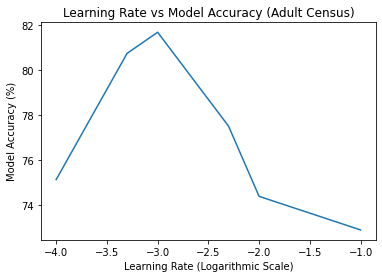

In [33]:
#Test Logisitc Regression over different learning rates

#May need to play around with num_steps and min_error (stopping requirement)

#Initialize
learning_rates = [0.1,0.01,0.005,0.001,0.0005,0.0001]
lr_accuracy = []

for learning_rate in learning_rates:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 30000, learning_rate = learning_rate, min_error = 1e-2, random_shuffle = False)
    lr_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(np.log10(learning_rates), lr_accuracy)
plt.title("Learning Rate vs Model Accuracy (Adult Census)")
plt.xlabel("Learning Rate (Logarithmic Scale)")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 24999
Minimum Cost (J) = 0.8352536867362312
Weights of Model:  [-2.91497353 -0.07275681  0.34219888 -0.05787511  0.24958319 -0.77442551
 -1.09951637  0.64610684 -1.21846489 -0.68605285 -0.03220395 -0.61028485
 -0.68871361 -0.24537644 -0.10573814 -0.24981133 -0.53561409 -0.42588023
 -0.42535328 -0.37710743  0.71613841  0.65887027 -1.76321728  1.02448521
 -0.03202769  1.10660014 -0.96194318 -1.16145289  0.03799893  1.54152069
 -0.18654186 -2.50140191 -0.38711106 -0.25798543 -0.44511698 -0.01600433
 -1.03271968  2.07706371 -1.2029508  -0.92299455 -0.98546118 -1.49013771
 -0.07674597  1.30419076 -0.01342123  0.334726    0.24080039 -0.68620196
  0.66860372 -1.30424467 -0.50975139 -1.62469601 -1.25008538  1.1052002
 -1.95984717 -0.95512636]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  71.73913043478261 %
Recall:  2.7071369975389663 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.200477596673782
Weights of Model:  [-2.89745838  0.02

Number of Iterations = 24999
Minimum Cost (J) = 0.8352536867362312
Weights of Model:  [-2.91497353 -0.07275681  0.34219888 -0.05787511  0.24958319 -0.77442551
 -1.09951637  0.64610684 -1.21846489 -0.68605285 -0.03220395 -0.61028485
 -0.68871361 -0.24537644 -0.10573814 -0.24981133 -0.53561409 -0.42588023
 -0.42535328 -0.37710743  0.71613841  0.65887027 -1.76321728  1.02448521
 -0.03202769  1.10660014 -0.96194318 -1.16145289  0.03799893  1.54152069
 -0.18654186 -2.50140191 -0.38711106 -0.25798543 -0.44511698 -0.01600433
 -1.03271968  2.07706371 -1.2029508  -0.92299455 -0.98546118 -1.49013771
 -0.07674597  1.30419076 -0.01342123  0.334726    0.24080039 -0.68620196
  0.66860372 -1.30424467 -0.50975139 -1.62469601 -1.25008538  1.1052002
 -1.95984717 -0.95512636]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  71.73913043478261 %
Recall:  2.7071369975389663 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.200477596673782
Weights of Model:  [-2.89745838  0.02

Number of Iterations = 5337
Minimum Cost (J) = 0.4525735821860037
Weights of Model:  [-1.07147785 -0.03240554  0.23015083 -0.02268634  0.10255674 -0.13625761
 -0.92313252  0.28326809 -0.24953711 -0.14142061 -0.00695484 -0.18216972
 -0.2308678  -0.07959186 -0.0341643  -0.07553966 -0.14670881 -0.11626626
 -0.10652429 -0.08192284  0.52133339  0.20283542 -1.01417106  0.46020147
 -0.0102182   0.33356103 -0.51126434 -0.57020043  0.00788558  1.39841792
 -0.06581374 -1.56067896 -0.16457103 -0.1165172  -0.36850234 -0.00446481
 -0.44044124  0.89930888 -0.30634337 -0.33392206 -0.35710426 -0.66338216
 -0.03065331  0.65649218 -0.00810082  0.05050617  0.03779967 -0.20267038
  1.0706568  -0.83572505 -0.20575546 -0.91732169 -0.57328275  0.3899503
 -0.97077946 -0.1006984 ]
Accuracy:  80.4807293825114 %
Error Rate:  19.519270617488605 %
Precision:  62.602365787079165 %
Recall:  56.43970467596391 % 

Number of Iterations = 3243
Minimum Cost (J) = 0.46200850979931535
Weights of Model:  [-0.76037738 -0.039

Number of Iterations = 3796
Minimum Cost (J) = 0.46511697208950725
Weights of Model:  [-0.8463609  -0.03888557  0.25087511 -0.03339371  0.07058891 -0.0472174
 -0.8903936   0.25497358 -0.13896691 -0.09022088 -0.0051246  -0.15229538
 -0.19217656 -0.06221406 -0.02200475 -0.05351364 -0.12003473 -0.08788923
 -0.04825538 -0.019933    0.4402277   0.15767721 -0.86241392  0.36581864
 -0.00729608  0.23048018 -0.4125379  -0.52852913  0.00542102  1.41442993
 -0.05800186 -1.41909056 -0.15388194 -0.10670835 -0.35883035 -0.00298869
 -0.31537058  0.70811105 -0.1986525  -0.26748053 -0.27668554 -0.55829075
 -0.02514615  0.54576564  0.01351007  0.02069761  0.0232454  -0.15424558
  1.14650366 -0.83131451 -0.16371405 -0.8159122  -0.49393147  0.31200767
 -0.92365797  0.07729707]
Accuracy:  79.87981765437215 %
Error Rate:  20.12018234562785 %
Precision:  58.95390070921985 %
Recall:  56.692242114237004 % 

average cross validation model accuracy = 79.50269374222958% 

Number of Iterations = 3037
Minimum Cost 

Number of Iterations = 2440
Minimum Cost (J) = 0.4759168637626491
Weights of Model:  [-0.63560422 -0.04619395  0.28761222 -0.04563199  0.0525033  -0.0060142
 -0.77392404  0.19542025 -0.05342428 -0.04714365 -0.00302161 -0.10315872
 -0.13773537 -0.04563264 -0.02019333 -0.03396758 -0.08083046 -0.06244104
 -0.04572309 -0.01208909  0.37973515  0.11231197 -0.70395706  0.28727492
 -0.00587669  0.1829103  -0.34623148 -0.4334035   0.00453325  1.3008285
 -0.04284796 -1.24762225 -0.11885945 -0.09823282 -0.29550265 -0.00165711
 -0.22078012  0.54320572 -0.14429291 -0.19619955 -0.19937623 -0.44249315
 -0.02161978  0.40971889  0.01225305  0.00276133  0.01888467 -0.10050638
  1.09089919 -0.74383175 -0.12613365 -0.68116848 -0.40999677  0.23462725
 -0.83232177  0.19671755]
Accuracy:  79.87981765437215 %
Error Rate:  20.12018234562785 %
Precision:  60.32660902977906 %
Recall:  52.951096121416526 % 

Number of Iterations = 2717
Minimum Cost (J) = 0.4674034681482247
Weights of Model:  [-0.67700704 -0.04131

Text(0, 0.5, 'Model Accuracy (%)')

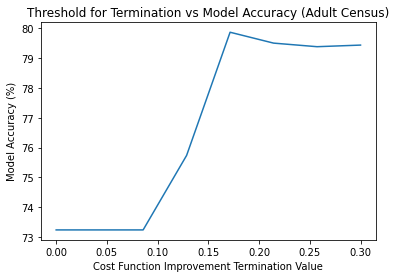

In [34]:
#Threshold of change in value of cost function as termination criteria
#Test Logisitc Regression over different thresholds of cost function improvement

#Initialize
termination_thresholds = np.linspace(0, 0.3, num=8)
termination_accuracy = []

for threshold in termination_thresholds:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.01, min_error = threshold, random_shuffle = False)
    termination_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(termination_thresholds, termination_accuracy)
plt.title("Threshold for Termination vs Model Accuracy (Adult Census)")
plt.xlabel("Cost Function Improvement Termination Value")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 24999
Minimum Cost (J) = 0.8352536867362312
Weights of Model:  [-2.91497353 -0.07275681  0.34219888 -0.05787511  0.24958319 -0.77442551
 -1.09951637  0.64610684 -1.21846489 -0.68605285 -0.03220395 -0.61028485
 -0.68871361 -0.24537644 -0.10573814 -0.24981133 -0.53561409 -0.42588023
 -0.42535328 -0.37710743  0.71613841  0.65887027 -1.76321728  1.02448521
 -0.03202769  1.10660014 -0.96194318 -1.16145289  0.03799893  1.54152069
 -0.18654186 -2.50140191 -0.38711106 -0.25798543 -0.44511698 -0.01600433
 -1.03271968  2.07706371 -1.2029508  -0.92299455 -0.98546118 -1.49013771
 -0.07674597  1.30419076 -0.01342123  0.334726    0.24080039 -0.68620196
  0.66860372 -1.30424467 -0.50975139 -1.62469601 -1.25008538  1.1052002
 -1.95984717 -0.95512636]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  71.73913043478261 %
Recall:  2.7071369975389663 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.200477596673782
Weights of Model:  [-2.89745838  0.02

Number of Iterations = 29999
Minimum Cost (J) = 0.8332192441230221
Weights of Model:  [-3.23831032 -0.06202472  0.32687126 -0.04272788  0.21365861 -0.79514169
 -1.20064216  0.82136725 -1.40624958 -0.83662991 -0.03467284 -0.78012381
 -0.81465689 -0.27628734 -0.09473927 -0.25619004 -0.68331384 -0.48980916
 -0.30682534 -0.22098544  0.63310629  0.79051091 -1.86950301  1.02080534
 -0.03113709  1.09041084 -0.94957247 -1.26044392  0.04394169  1.60376883
 -0.21859764 -2.60860478 -0.51611643 -0.28225807 -0.4993942  -0.01857336
 -1.08730223  2.2129178  -1.27801675 -1.10049562 -1.13740924 -1.63830351
 -0.07379387  1.39620176  0.08107071  0.41568478  0.31270133 -0.8235979
  0.55351457 -1.41166612 -0.51793589 -1.80046653 -1.37626035  1.31450399
 -2.16584126 -1.07246906]
Accuracy:  76.91670120182346 %
Error Rate:  23.083298798176543 %
Precision:  79.20792079207921 %
Recall:  6.820119352088662 % 

average cross validation model accuracy = 74.39287194363862% 

Number of Iterations = 39999
Minimum Cost

Number of Iterations = 44999
Minimum Cost (J) = 0.8024955020581112
Weights of Model:  [-3.97218228 -0.04149927  0.31768693 -0.02187939  0.223866   -1.03597158
 -1.07479523  0.84277246 -1.73557215 -1.14200558 -0.05047621 -1.04979505
 -1.04802851 -0.38052704 -0.12681836 -0.33775125 -0.92979255 -0.66698771
 -0.38490371 -0.26292857  0.56151603  1.01198058 -1.73281034  1.00471077
 -0.04392366  1.3544057  -0.94052861 -1.46058208  0.06329505  1.48569973
 -0.28712065 -2.73296827 -0.66396509 -0.37654096 -0.41463955 -0.02620224
 -1.07306413  2.30365962 -1.69539261 -1.3783223  -1.36711517 -1.93895795
 -0.0956501   1.48280847  0.17294691  0.57459555  0.50530524 -1.022154
  0.23067394 -1.48092087 -0.64624457 -2.04562581 -1.63530747  1.6052425
 -2.63976329 -1.33241899]
Accuracy:  77.99419809365935 %
Error Rate:  22.005801906340654 %
Precision:  83.23353293413174 %
Recall:  11.84995737425405 % 

average cross validation model accuracy = 75.92623290509741% 



Text(0, 0.5, 'Model Accuracy (%)')

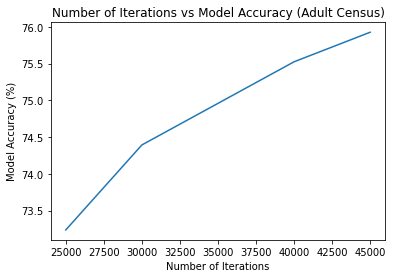

In [35]:
#Plot Accuracy of Train/Validation Set as a Function of Iterations of Gradient Descent
#Limit number of steps

#Initialize
number_of_iterations = [25000, 30000, 40000, 45000]
iter_accuracy = []

for num_steps in number_of_iterations:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = num_steps, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
    iter_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(number_of_iterations, iter_accuracy)
plt.title("Number of Iterations vs Model Accuracy (Adult Census)")
plt.xlabel("Number of Iterations")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 24999
Minimum Cost (J) = 0.8352536867362312
Weights of Model:  [-2.91497353 -0.07275681  0.34219888 -0.05787511  0.24958319 -0.77442551
 -1.09951637  0.64610684 -1.21846489 -0.68605285 -0.03220395 -0.61028485
 -0.68871361 -0.24537644 -0.10573814 -0.24981133 -0.53561409 -0.42588023
 -0.42535328 -0.37710743  0.71613841  0.65887027 -1.76321728  1.02448521
 -0.03202769  1.10660014 -0.96194318 -1.16145289  0.03799893  1.54152069
 -0.18654186 -2.50140191 -0.38711106 -0.25798543 -0.44511698 -0.01600433
 -1.03271968  2.07706371 -1.2029508  -0.92299455 -0.98546118 -1.49013771
 -0.07674597  1.30419076 -0.01342123  0.334726    0.24080039 -0.68620196
  0.66860372 -1.30424467 -0.50975139 -1.62469601 -1.25008538  1.1052002
 -1.95984717 -0.95512636]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  71.73913043478261 %
Recall:  2.7071369975389663 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.200477596673782
Weights of Model:  [-2.89745838  0.02

Number of Iterations = 24999
Minimum Cost (J) = 0.8586132931882186
Weights of Model:  [-2.90901412 -0.07526785  0.34488928 -0.05511932  0.15420507 -0.6716386
 -1.22475856  0.75664754 -1.18854424 -0.70769547 -0.02722985 -0.65212573
 -0.68901802 -0.22970162 -0.09375786 -0.21526651 -0.61108569 -0.39265992
 -0.32344734 -0.19830678  0.58704043  0.6899117  -1.87480847  1.02241337
 -0.02627487  1.03140045 -0.93332725 -1.11910119  0.04085024  1.62799542
 -0.19766766 -2.55377738 -0.45091645 -0.2563971  -0.49677655 -0.01740418
 -1.00710377  2.05636686 -1.11001624 -0.98924814 -1.03932127 -1.57007506
 -0.06310401  1.36618268  0.05068001  0.34485737  0.27742305 -0.71147486
  0.62039569 -1.37517796 -0.4713316  -1.67720235 -1.2335864   1.2278885
 -2.00382126 -0.90519286]
Accuracy:  75.61593368639188 %
Error Rate:  24.384066313608106 %
Precision:  66.66666666666666 %
Recall:  3.707136237256719 % 

average cross validation model accuracy = 74.28966152429196% 

Accuracy:  79.55330416762607 %
Error Rate:

Number of Iterations = 24999
Minimum Cost (J) = 0.8564796545668191
Weights of Model:  [-2.8072604  -0.08136337  0.36609886 -0.06125469  0.01994481 -0.47553697
 -1.30107811  0.90230455 -1.1453257  -0.78214335 -0.02542562 -0.65070409
 -0.63575201 -0.20796302 -0.10315038 -0.22198666 -0.65194279 -0.44441601
 -0.29084605 -0.15007922  0.52663743  0.6233943  -1.59843846  0.90655975
 -0.02129805  0.99899827 -0.88627342 -1.03902802  0.04169305  1.69502071
 -0.17520159 -2.48140922 -0.48999986 -0.35833546 -0.7012382  -0.01755719
 -1.03296442  2.05528006 -1.08277239 -0.93356232 -1.01718032 -1.50003961
 -0.04624975  1.21299644  0.10405126  0.35568029  0.42905224 -0.63275648
  0.48332776 -1.30888233 -0.4338424  -1.68790927 -1.2247495   1.36479534
 -1.95212513 -0.85513527]
Accuracy:  74.76170741815167 %
Error Rate:  25.23829258184832 %
Precision:  66.66666666666666 %
Recall:  1.951219512195122 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.2426754492298908
Weights of Model:  [-2.87528279  0.01

Accuracy:  78.5240464344942 %
Error Rate:  21.475953565505804 %
Precision:  58.55855855855856 %
Recall:  77.61194029850746 % 

Accuracy:  78.27529021558873 %
Error Rate:  21.724709784411278 %
Precision:  53.31858407079646 %
Recall:  82.53424657534246 % 

Accuracy:  78.27529021558873 %
Error Rate:  21.724709784411278 %
Precision:  53.546910755148744 %
Recall:  79.86348122866895 % 

Accuracy:  76.53399668325042 %
Error Rate:  23.466003316749585 %
Precision:  51.7162471395881 %
Recall:  75.83892617449665 % 

Accuracy:  77.86069651741293 %
Error Rate:  22.139303482587064 %
Precision:  51.74825174825175 %
Recall:  78.72340425531915 % 

average cross validation model accuracy = 77.893864013267% 



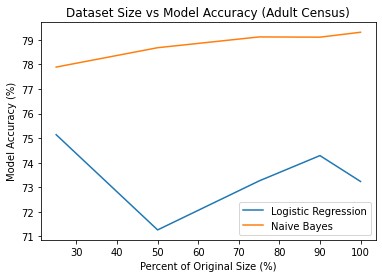

In [36]:
#Adjust size of datasets and compare accuracy
#Compare 5 different sizes

Model_Naive_Bayes = MultinomialNaiveBayes()
Model_Logistic_Regression = LogisticRegression(intercept = True)

length = int(len(x_train))
length90 = int(length*0.9)
length75 = int(length*0.75)
length50 = int(length*0.5)
length25 = int(length*0.25)
length10 = int(length*0.1)

x_train_reduced = [x_train[:length90,:], x_train[:length75,:], x_train[:length50,:], x_train[:length25,:], x_train[:length10,:]] 
y_train_reduced = [y_train[:length90], y_train[:length75], y_train[:length50], y_train[:length25], y_train[:length10]]
percentage_of_original = [100, 90, 75, 50, 25]
lr_accuracy = []
nb_accuracy = []

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb, y_train_nb, K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)


lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length90,:], y_train[:length90], K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb[:length90,:], y_train_nb[:length90], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length75,:], y_train[:length75], K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb[:length75,:], y_train_nb[:length75], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length50,:], y_train[:length50], K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb[:length50,:], y_train_nb[:length50], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length25,:], y_train[:length25], K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb[:length25,:], y_train_nb[:length25], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

#lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length10,:], y_train[:length10], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
#nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length10,:], y_train[:length10], K = 5, random_shuffle = False)
#lr_accuracy.append(lr_average_cross_validation_accuracy)
#nb_accuracy.append(nb_average_cross_validation_accuracy)
        

#Plot
plt.plot(percentage_of_original, lr_accuracy)
plt.plot(percentage_of_original, nb_accuracy)
plt.title("Dataset Size vs Model Accuracy (Adult Census)")
plt.xlabel("Percent of Original Size (%)")
plt.ylabel("Model Accuracy (%)")
plt.legend(["Logistic Regression", "Naive Bayes"])

Number of Iterations = 24999
Minimum Cost (J) = 1.2513203119461669
Weights of Model:  [-2.8650683   0.02066554  0.38295428  0.04011985  0.20874811 -0.68481554
 -1.18411095  0.69734519 -1.19642916 -0.6789539  -0.02685206 -0.61572407
 -0.70837238 -0.22939384 -0.10791722 -0.23615276 -0.55123254 -0.42134293
 -0.34523876 -0.27493368  0.63115234  0.66445947 -1.75132329  0.98375806
 -0.03272688  1.03212382 -0.90220363 -1.15395294  0.03619438  1.60005465
 -0.18821533 -2.44480219 -0.43537966 -0.27896721 -0.47148684 -0.01280319
 -0.99148547  2.00519253 -1.14264833 -0.92573687 -0.96106365 -1.46711581
 -0.07125705  1.24909453  0.04195761  0.33726031  0.24422751 -0.69920359
  0.64483427 -1.29766876 -0.47852775 -1.6352409  -1.26252879  1.16406362
 -1.93757721 -0.92749109]
Accuracy:  70.22546419098144 %
Error Rate:  29.774535809018566 %
Precision:  45.52479072762395 %
Recall:  93.14888010540184 % 

Number of Iterations = 24999
Minimum Cost (J) = 0.8588168590347804
Weights of Model:  [-2.89985194 -0.0

Accuracy:  77.65251989389921 %
Error Rate:  22.347480106100797 %
Precision:  53.82194244604317 %
Recall:  78.85375494071147 % 

Accuracy:  77.58620689655173 %
Error Rate:  22.413793103448278 %
Precision:  53.72197309417041 %
Recall:  78.91963109354414 % 

Accuracy:  77.55305039787798 %
Error Rate:  22.446949602122015 %
Precision:  53.67713004484305 %
Recall:  78.85375494071147 % 

Accuracy:  77.78514588859416 %
Error Rate:  22.214854111405835 %
Precision:  54.01987353206865 %
Recall:  78.78787878787878 % 

Accuracy:  77.56962864721486 %
Error Rate:  22.430371352785148 %
Precision:  53.697893321380555 %
Recall:  78.91963109354414 % 

Accuracy:  77.53647214854111 %
Error Rate:  22.463527851458885 %
Precision:  53.662921348314605 %
Recall:  78.65612648221344 % 

Accuracy:  77.42042440318302 %
Error Rate:  22.579575596816976 %
Precision:  53.48837209302325 %
Recall:  78.78787878787878 % 

Accuracy:  77.68567639257294 %
Error Rate:  22.314323607427056 %
Precision:  53.877366997294864 %
Reca

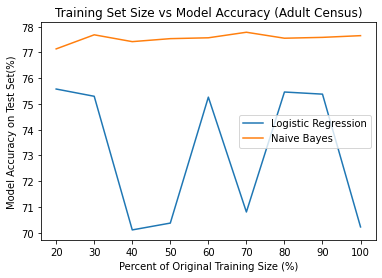

In [30]:
#The Accuracy of the Test set based on different sizes of the training set
#Need to choose optimum hyper-parameters on Logistic Regression

length = int(len(x_train))
length90 = int(length*0.90)
length80 = int(length*0.80)
length70 = int(length*0.70)
length60 = int(length*0.60)
length50 = int(length*0.50)
length40 = int(length*0.40)
length30 = int(length*0.30)
length20 = int(length*0.20)

x_train_reduced = [x_train, x_train[:length90,:], x_train[:length80,:], x_train[:length70,:],x_train[:length60,:], x_train[:length50,:], x_train[:length40,:],x_train[:length30,:], x_train[:length20,:]] 
y_train_reduced = [y_train, y_train[:length90], y_train[:length80], y_train[:length70], y_train[:length60], y_train[:length50], y_train[:length40], y_train[:length30], y_train[:length20]]
percentage_of_original = [100, 90, 80, 70, 60, 50, 40, 30, 20]
LR_accuracy = []
NB_accuracy = []


model_LR = LogisticRegression(intercept = True)
for i in range(len(x_train_reduced)):
    w = model_LR.fit(x_train_reduced[i], y_train_reduced[i], num_steps = 25000, learning_rate = 0.01, min_error = 1e-2)            
    
    y_pred = model_LR.predict(x_test, w)
    
    accuracy = model_LR.evaluate_acc(y_test, y_pred)
    LR_accuracy.append(accuracy)


model_NB = MultinomialNaiveBayes()
for i in range(len(x_train_reduced)):
    likelihoods, neg_prior,pos_prior = model_NB.fit(x_train_reduced[i], y_train_reduced[i])
    
    y_pred = model_NB.predict(x_test,likelihoods, neg_prior,pos_prior)
    
    accuracy = model_NB.evaluate_acc(y_test,y_pred)
    NB_accuracy.append(accuracy)
    

#Plot
plt.plot(percentage_of_original, LR_accuracy)
plt.plot(percentage_of_original, NB_accuracy)
plt.title("Training Set Size vs Model Accuracy (Adult Census)")
plt.xlabel("Percent of Original Training Size (%)")
plt.ylabel("Model Accuracy on Test Set(%)")
plt.legend(["Logistic Regression", "Naive Bayes"])